In [1]:
from google.colab import files
uploaded = files.upload()

Saving SHIP_Emergency_Department_Visit_Rate_Due_To_Diabetes_2008-2017.csv to SHIP_Emergency_Department_Visit_Rate_Due_To_Diabetes_2008-2017.csv


In [115]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['SHIP_Emergency_Department_Visit_Rate_Due_To_Diabetes_2008-2017.csv']))

In [5]:
df.head(5)

,Jurisdiction,Value,Race/ ethnicity,Year,Measure
0,State,243.7,All races/ ethnicities (aggregated),2017,Diabetes ED visits
1,Allegany,286.1,All races/ ethnicities (aggregated),2017,Diabetes ED visits
2,Anne Arundel,187.4,All races/ ethnicities (aggregated),2017,Diabetes ED visits
3,Baltimore City,584.6,All races/ ethnicities (aggregated),2017,Diabetes ED visits
4,Baltimore County,224.6,All races/ ethnicities (aggregated),2017,Diabetes ED visits


In [6]:
df.sample(5)

,Jurisdiction,Value,Race/ ethnicity,Year,Measure
751,Allegany,240.1,All races/ ethnicities (aggregated),2011,Diabetes ED visits
168,Queen Anne's,NaN,Black Non-Hispanic,2016,Diabetes ED visits
164,Howard,339.1,Black Non-Hispanic,2016,Diabetes ED visits
1160,Dorchester,664.2,Black Non-Hispanic,2008,Diabetes ED visits
941,Montgomery,54.3,Hispanic,2010,Diabetes ED visits


Print some details of the DF

In [11]:
print("Index/Labels")
print(df.index)
print()

print("Column Names")
print(df.columns)
print()

print("Feature Types")
print(df.dtypes)
print()

print("Shape details:")
print(df.shape)

Index/Labels
RangeIndex(start=0, stop=1250, step=1)

Column Names
Index(['Jurisdiction', 'Value', 'Race/ ethnicity', 'Year', 'Measure'], dtype='object')

Feature Types
Jurisdiction        object
Value              float64
Race/ ethnicity     object
Year                 int64
Measure             object
dtype: object

Shape details:
(1250, 5)


Potential DV/IV

In [12]:
#IV (x) = Race/ ethnicity
#DV (y) = value
X = df.iloc[:,3]
Y = df.iloc[:,2]

Value counts

In [18]:
print("Year")
print(df['Year'].value_counts())
print()

print("Race/ ethnicity")
print(df['Race/ ethnicity'].value_counts())
print()

print("Jurisdiction")
print(df['Jurisdiction'].value_counts())
print()

Year
2017    125
2016    125
2015    125
2014    125
2013    125
2012    125
2011    125
2010    125
2009    125
2008    125
Name: Year, dtype: int64

Race/ ethnicity
Asian/ Pacific Islander Non-Hispanic    250
Hispanic                                250
All races/ ethnicities (aggregated)     250
White Non-Hispanic                      225
Black Non-Hispanic                      225
White                                    25
Black                                    25
Name: Race/ ethnicity, dtype: int64

Jurisdiction
Frederick           50
Calvert             50
Queen Anne's        50
Worcester           50
Baltimore County    50
Montgomery          50
Somerset            50
Kent                50
Howard              50
Washington          50
Anne Arundel        50
Wicomico            50
Carroll             50
Saint Mary's        50
Baltimore City      50
Cecil               50
Dorchester          50
Caroline            50
Allegany            50
Charles             50
State          

# From the above print out, we can conclude that:
(1) There a race group called "All races/ ethnicities (aggregated)" - we can break this categoric into a single table 

# Address missing data
There are 611 rows with missing values among different ethnicity groups . In order to handle the missing values, the row with missing data in column 'Value' will be dropped



In [19]:
#potential missing data in "All race/ ethnicities (aggregated)"
df_a = df[df['Race/ ethnicity'] == 'All races/ ethnicities (aggregated)']
df_a.sample(10)

,Jurisdiction,Value,Race/ ethnicity,Year,Measure
766,Montgomery,90.5,All races/ ethnicities (aggregated),2011,Diabetes ED visits
627,Anne Arundel,164.1,All races/ ethnicities (aggregated),2012,Diabetes ED visits
898,Wicomico,364.2,All races/ ethnicities (aggregated),2010,Diabetes ED visits
388,Harford,165.5,All races/ ethnicities (aggregated),2014,Diabetes ED visits
19,Saint Mary's,299.5,All races/ ethnicities (aggregated),2017,Diabetes ED visits
143,Queen Anne's,143.8,All races/ ethnicities (aggregated),2016,Diabetes ED visits
1016,Montgomery,81.3,All races/ ethnicities (aggregated),2009,Diabetes ED visits
1022,Washington,148.5,All races/ ethnicities (aggregated),2009,Diabetes ED visits
1009,Charles,165.2,All races/ ethnicities (aggregated),2009,Diabetes ED visits
771,Talbot,206.3,All races/ ethnicities (aggregated),2011,Diabetes ED visits


In [21]:
#potential missing data in race groups other than all races aggregated 
df_not_a = df[df['Race/ ethnicity'] != 'All races/ ethnicities (aggregated)']
df_not_a.sample(10)

,Jurisdiction,Value,Race/ ethnicity,Year,Measure
1119,Saint Mary's,NaN,Asian/ Pacific Islander Non-Hispanic,2009,Diabetes ED visits
1104,Baltimore County,NaN,Asian/ Pacific Islander Non-Hispanic,2009,Diabetes ED visits
544,Saint Mary's,579.0,Black Non-Hispanic,2013,Diabetes ED visits
1070,Somerset,NaN,Hispanic,2009,Diabetes ED visits
168,Queen Anne's,NaN,Black Non-Hispanic,2016,Diabetes ED visits
412,Garrett,NaN,Black Non-Hispanic,2014,Diabetes ED visits
907,Carroll,NaN,Black Non-Hispanic,2010,Diabetes ED visits
721,Talbot,NaN,White Non-Hispanic,2012,Diabetes ED visits
325,State,120.4,White,2015,Diabetes ED visits
101,Allegany,NaN,Asian/ Pacific Islander Non-Hispanic,2017,Diabetes ED visits


In [23]:
#From above, we can see there are various missing data in race groups other than
#"all races" - We will find the missing value in all the other race groups
df_no_a_missing = df_not_a
df_no_a_missing = df_no_a_missing[pd.isnull(df_no_a_missing['Value'])]
df_no_a_missing.sample(10)

,Jurisdiction,Value,Race/ ethnicity,Year,Measure
444,Saint Mary's,NaN,Hispanic,2014,Diabetes ED visits
1245,Somerset,NaN,Asian/ Pacific Islander Non-Hispanic,2008,Diabetes ED visits
657,Carroll,NaN,Black Non-Hispanic,2012,Diabetes ED visits
721,Talbot,NaN,White Non-Hispanic,2012,Diabetes ED visits
863,Harford,NaN,Asian/ Pacific Islander Non-Hispanic,2011,Diabetes ED visits
820,Somerset,NaN,Hispanic,2011,Diabetes ED visits
186,Frederick,NaN,Hispanic,2016,Diabetes ED visits
1172,Washington,NaN,Black Non-Hispanic,2008,Diabetes ED visits
918,Queen Anne's,NaN,Black Non-Hispanic,2010,Diabetes ED visits
682,Carroll,NaN,Hispanic,2012,Diabetes ED visits


In [25]:
#We find there are 616 missing data in "value" column
df.isnull().sum()

Jurisdiction         0
Value              616
Race/ ethnicity      0
Year                 0
Measure              0
dtype: int64

In [27]:
#Missing data in "value" column
df[df.Value.isnull()]


,Jurisdiction,Value,Race/ ethnicity,Year,Measure
26,Allegany,NaN,Black Non-Hispanic,2017,Diabetes ED visits
31,Caroline,NaN,Black Non-Hispanic,2017,Diabetes ED visits
32,Carroll,NaN,Black Non-Hispanic,2017,Diabetes ED visits
33,Cecil,NaN,Black Non-Hispanic,2017,Diabetes ED visits
37,Garrett,NaN,Black Non-Hispanic,2017,Diabetes ED visits
...,...,...,...,...,...
1245,Somerset,NaN,Asian/ Pacific Islander Non-Hispanic,2008,Diabetes ED visits
1246,Talbot,NaN,Asian/ Pacific Islander Non-Hispanic,2008,Diabetes ED visits
1247,Washington,NaN,Asian/ Pacific Islander Non-Hispanic,2008,Diabetes ED visits
1248,Wicomico,NaN,Asian/ Pacific Islander Non-Hispanic,2008,Diabetes ED visits


In [28]:
#number of rows and columns before adjustment of missing data
df.shape

(1250, 5)

In [29]:
#drop a row if "value" is missing of a given row
df.dropna(subset=['Value'], how='any').shape

(634, 5)

# Transformation
1) Under the Race/ethnicity column, there is 250 rows of race/ethnicities (aggregated) --> It can tranform into a single table which to clearly see total diabetes ED admission visit values for all races in different county and year.

2) Year 2017 has highest mean and standard deviation. we can transform the table into a single table with only year 2017.

3)sort out year of 2017 to see # of diabetes ED visits from ascending order

4) sort out "black non-hispanic" as this gourp has the highest ED rate in year 2017

5)sort out Wiscomico as it has the highest ED rate compared to other jurisdiction



In [38]:
df_group = df.groupby (['Year'])
df_group.describe()

Value                                                                
     count        mean         std   min      25%     50%      75%     max
Year                                                                      
2008  56.0  208.126786  162.322638  29.1   96.225  157.15  263.000   864.8
2009  56.0  215.783929  173.306269  28.8  109.225  164.80  240.550   897.4
2010  58.0  218.534483  180.048737  30.0  102.350  166.30  241.075   890.7
2011  61.0  232.593443  201.280500  24.5  115.300  171.10  243.300   923.8
2012  61.0  241.016393  193.746081  28.7  115.600  194.80  254.100  1003.0
2013  64.0  243.350000  195.500295  33.3  123.875  181.05  288.525   972.0
2014  69.0  255.671014  205.437738  28.6  130.200  201.90  276.400  1085.5
2015  65.0  285.726154  214.768811  31.9  152.400  225.10  345.800  1048.7
2016  71.0  289.877465  213.874048  41.9  157.650  228.60  335.800  1253.1
2017  73.0  312.435616  216.687884  39.7  169.200  263.60  381.000  1110.1

In [39]:
df = df.groupby (['Race/ ethnicity'])
df.describe()

Value              ...    Year        
                                      count        mean  ...     75%     max
Race/ ethnicity                                          ...                
All races/ ethnicities (aggregated)   242.0  224.828512  ...  2015.0  2017.0
Asian/ Pacific Islander Non-Hispanic   15.0   34.726667  ...  2015.0  2017.0
Black                                  17.0  535.700000  ...  2015.0  2015.0
Black Non-Hispanic                    131.0  480.439695  ...  2014.0  2017.0
Hispanic                               30.0  125.020000  ...  2015.0  2017.0
White                                  22.0  166.559091  ...  2015.0  2015.0
White Non-Hispanic                    177.0  147.414689  ...  2014.0  2017.0

[7 rows x 16 columns]

In [42]:
df_group_Jurisdiction = df.groupby(['Jurisdiction'])
df_group_Jurisdiction.describe()

Value                          ...    Year                
                 count        mean         std  ...     50%     75%     max
Jurisdiction                                    ...                        
Allegany          20.0  230.005000   31.004150  ...  2012.5  2015.0  2017.0
Anne Arundel      32.0  213.828125  115.573778  ...  2012.5  2015.0  2017.0
Baltimore City    31.0  428.561290  186.308459  ...  2012.5  2015.0  2017.0
Baltimore County  31.0  215.080645  122.733306  ...  2012.5  2015.0  2017.0
Calvert           23.0  237.473913  185.430605  ...  2012.5  2015.0  2017.0
Caroline          13.0  223.553846   42.440048  ...  2012.5  2015.0  2017.0
Carroll           20.0  112.295000   16.793466  ...  2012.5  2015.0  2017.0
Cecil             21.0  237.309524  110.541865  ...  2012.5  2015.0  2017.0
Charles           27.0  198.514815   77.031496  ...  2012.5  2015.0  2017.0
Dorchester        25.0  614.644000  309.347149  ...  2012.5  2015.0  2017.0
Frederick         30.0  231.536667  145.396323  ...  2012.5  2015.0  2017.0
Garrett           15.0  275.500000   62.062296  ...  2012.5  2015.0  2017.0
Harford           28.0  211.246429  124.647157  ...  2012.5  2015.0  2017.0
Howard            30.0  149.666667   91.973824  ...  2012.5  2015.0  2017.0
Kent               5.0  269.940000   56.530461  ...  2012.5  2015.0  2017.0
Montgomery        44.0  108.836364   74.799201  ...  2012.5  2015.0  2017.0
Prince George's   38.0  142.068421   53.698060  ...  2012.5  2015.0  2017.0
Queen Anne's      14.0  129.514286   21.139604  ...  2012.5  2015.0  2017.0
Saint Mary's      29.0  341.537931  239.006629  ...  2012.5  2015.0  2017.0
Somerset          12.0  348.683333  114.621209  ...  2012.5  2015.0  2017.0
State             49.0  162.853061  114.432906  ...  2012.5  2015.0  2017.0
Talbot            18.0  301.838889  268.387199  ...  2012.5  2015.0  2017.0
Washington        24.0  250.437500  153.299113  ...  2012.5  2015.0  2017.0
Wicomico          30.0  481.166667  280.668456  ...  2012.5  2015.0  2017.0
Worcester         25.0  399.248000  285.349613  ...  2012.5  2015.0  2017.0

[25 rows x 16 columns]

In [46]:
#1. transformed by sort out table with only column 'All races/ethnicities （aggregated）
df_races = df 
df_races = df[df['Race/ ethnicity'] == 'All races/ ethnicities (aggregated)']
df_races.sample(10)

,Jurisdiction,Value,Race/ ethnicity,Year,Measure
11,Frederick,181.6,All races/ ethnicities (aggregated),2017,Diabetes ED visits
1024,Worcester,261.1,All races/ ethnicities (aggregated),2009,Diabetes ED visits
18,Queen Anne's,144.6,All races/ ethnicities (aggregated),2017,Diabetes ED visits
10,Dorchester,525.2,All races/ ethnicities (aggregated),2017,Diabetes ED visits
888,Harford,156.8,All races/ ethnicities (aggregated),2010,Diabetes ED visits
1137,Garrett,259.9,All races/ ethnicities (aggregated),2008,Diabetes ED visits
132,Carroll,129.4,All races/ ethnicities (aggregated),2016,Diabetes ED visits
23,Wicomico,530.9,All races/ ethnicities (aggregated),2017,Diabetes ED visits
642,Prince George's,168.5,All races/ ethnicities (aggregated),2012,Diabetes ED visits
504,Baltimore County,172.0,All races/ ethnicities (aggregated),2013,Diabetes ED visits


In [48]:
#2. Year 2017 has the highest mean of ED visit value
# - sort out year '2017' and  into one table 
df_year = df 
df_year = df[df['Year'] == 2017]
df_year.sample(10)

,Jurisdiction,Value,Race/ ethnicity,Year,Measure
8,Cecil,272.2,All races/ ethnicities (aggregated),2017,Diabetes ED visits
87,Garrett,388.2,White Non-Hispanic,2017,Diabetes ED visits
77,Anne Arundel,133.1,White Non-Hispanic,2017,Diabetes ED visits
69,Saint Mary's,NaN,Hispanic,2017,Diabetes ED visits
16,Montgomery,127.9,All races/ ethnicities (aggregated),2017,Diabetes ED visits
34,Charles,359.2,Black Non-Hispanic,2017,Diabetes ED visits
81,Caroline,204.9,White Non-Hispanic,2017,Diabetes ED visits
120,Somerset,NaN,Asian/ Pacific Islander Non-Hispanic,2017,Diabetes ED visits
13,Harford,216.3,All races/ ethnicities (aggregated),2017,Diabetes ED visits
71,Talbot,NaN,Hispanic,2017,Diabetes ED visits


In [49]:
#3. sort out year of 2017 to see # of diabetes ED visits from ascending order
df_2017 = df[df['Year'] == 2017]
df_2017 = df_2017.sort_values(by='Value', ascending=False)
df_2017.head(10)

,Jurisdiction,Value,Race/ ethnicity,Year,Measure
35,Dorchester,1110.1,Black Non-Hispanic,2017,Diabetes ED visits
48,Wicomico,1103.6,Black Non-Hispanic,2017,Diabetes ED visits
28,Baltimore City,774.4,Black Non-Hispanic,2017,Diabetes ED visits
49,Worcester,767.0,Black Non-Hispanic,2017,Diabetes ED visits
44,Saint Mary's,749.6,Black Non-Hispanic,2017,Diabetes ED visits
45,Somerset,672.9,Black Non-Hispanic,2017,Diabetes ED visits
30,Calvert,631.8,Black Non-Hispanic,2017,Diabetes ED visits
3,Baltimore City,584.6,All races/ ethnicities (aggregated),2017,Diabetes ED visits
23,Wicomico,530.9,All races/ ethnicities (aggregated),2017,Diabetes ED visits
10,Dorchester,525.2,All races/ ethnicities (aggregated),2017,Diabetes ED visits


In [54]:
#4. sort out "black non-hispanic" as this gourp has the highest ED rate in year 2017
df_2017 = df[df['Year'] == 2017][df['Race/ ethnicity'] == 'Black Non-Hispanic']
df_2017 = df_2017.sort_values(by='Value', ascending=False)
df_2017.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Jurisdiction,Value,Race/ ethnicity,Year,Measure
35,Dorchester,1110.1,Black Non-Hispanic,2017,Diabetes ED visits
48,Wicomico,1103.6,Black Non-Hispanic,2017,Diabetes ED visits
28,Baltimore City,774.4,Black Non-Hispanic,2017,Diabetes ED visits
49,Worcester,767.0,Black Non-Hispanic,2017,Diabetes ED visits
44,Saint Mary's,749.6,Black Non-Hispanic,2017,Diabetes ED visits
45,Somerset,672.9,Black Non-Hispanic,2017,Diabetes ED visits
30,Calvert,631.8,Black Non-Hispanic,2017,Diabetes ED visits
47,Washington,520.6,Black Non-Hispanic,2017,Diabetes ED visits
38,Harford,493.8,Black Non-Hispanic,2017,Diabetes ED visits
36,Frederick,490.0,Black Non-Hispanic,2017,Diabetes ED visits


In [147]:
#5. sort out Wiscomico as it has the highest ED rate compared to other jurisdiction
df_county = df 
df_county = df[df['Jurisdiction'] == "Wicomico"]
df_county

,Jurisdiction,Value,Race/ ethnicity,Year,Measure
23,Wicomico,530.9,All races/ ethnicities (aggregated),2017,Diabetes ED visits
48,Wicomico,1103.6,Black Non-Hispanic,2017,Diabetes ED visits
73,Wicomico,NaN,Hispanic,2017,Diabetes ED visits
98,Wicomico,318.5,White Non-Hispanic,2017,Diabetes ED visits
123,Wicomico,NaN,Asian/ Pacific Islander Non-Hispanic,2017,Diabetes ED visits
148,Wicomico,424.6,All races/ ethnicities (aggregated),2016,Diabetes ED visits
173,Wicomico,807.4,Black Non-Hispanic,2016,Diabetes ED visits
198,Wicomico,NaN,Hispanic,2016,Diabetes ED visits
223,Wicomico,297.6,White Non-Hispanic,2016,Diabetes ED visits
248,Wicomico,NaN,Asian/ Pacific Islander Non-Hispanic,2016,Diabetes ED visits


# Central tendency and distribution of response


In [73]:
#find mean, max, min and quartile range of the diabetes ED visits 
df = df.groupby (['Race/ ethnicity'])
df.describe()

Value              ...    Year        
                                      count        mean  ...     75%     max
Race/ ethnicity                                          ...                
All races/ ethnicities (aggregated)   242.0  224.828512  ...  2015.0  2017.0
Asian/ Pacific Islander Non-Hispanic   15.0   34.726667  ...  2015.0  2017.0
Black                                  17.0  535.700000  ...  2015.0  2015.0
Black Non-Hispanic                    131.0  480.439695  ...  2014.0  2017.0
Hispanic                               30.0  125.020000  ...  2015.0  2017.0
White                                  22.0  166.559091  ...  2015.0  2015.0
White Non-Hispanic                    177.0  147.414689  ...  2014.0  2017.0

[7 rows x 16 columns]

In [104]:
#mean of the diabetes ED visits
df = df.groupby (['Race/ ethnicity']).mean()
df

,Value,Year
Race/ ethnicity,,
All races/ ethnicities (aggregated),224.828512,2012.500000
Asian/ Pacific Islander Non-Hispanic,34.726667,2012.500000
Black,535.700000,2015.000000
Black Non-Hispanic,480.439695,2012.222222
Hispanic,125.020000,2012.500000
White,166.559091,2015.000000
White Non-Hispanic,147.414689,2012.222222


In [120]:
#median of the diabetes ED visit
df_median = df.groupby (['Race/ ethnicity']).median()
df_median

,Value,Year
Race/ ethnicity,,
All races/ ethnicities (aggregated),203.8,2012.5
Asian/ Pacific Islander Non-Hispanic,33.3,2012.5
Black,499.7,2015.0
Black Non-Hispanic,403.2,2012.0
Hispanic,114.5,2012.5
White,160.1,2015.0
White Non-Hispanic,132.2,2012.0


In [121]:
#find mode values
df.mode(numeric_only=True)

,Value,Year
0,78.2,2008
1,NaN,2009
2,NaN,2010
3,NaN,2011
4,NaN,2012
5,NaN,2013
6,NaN,2014
7,NaN,2015
8,NaN,2016
9,NaN,2017


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


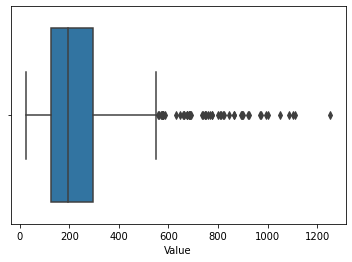

In [122]:
#use boxplot to see the distribution of the data
import seaborn as sns
sns.boxplot(x=df['Value'])

In [139]:
Q1 = df.quantile(0.10)
Q3 = df.quantile(0.90)
IQR = Q3 - Q1
df_2017 = df_2017[~((df_2017 < (Q1 - 1.5 * IQR)) |(df_2017 > (Q3 + 1.5 * IQR))).any(axis=1)]

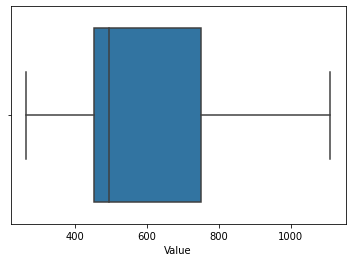

In [140]:
import seaborn as sns
sns.boxplot(x=df_2017['Value'])

# Visualization

Text(0.5, 1.0, 'Diabetes ED Visits')

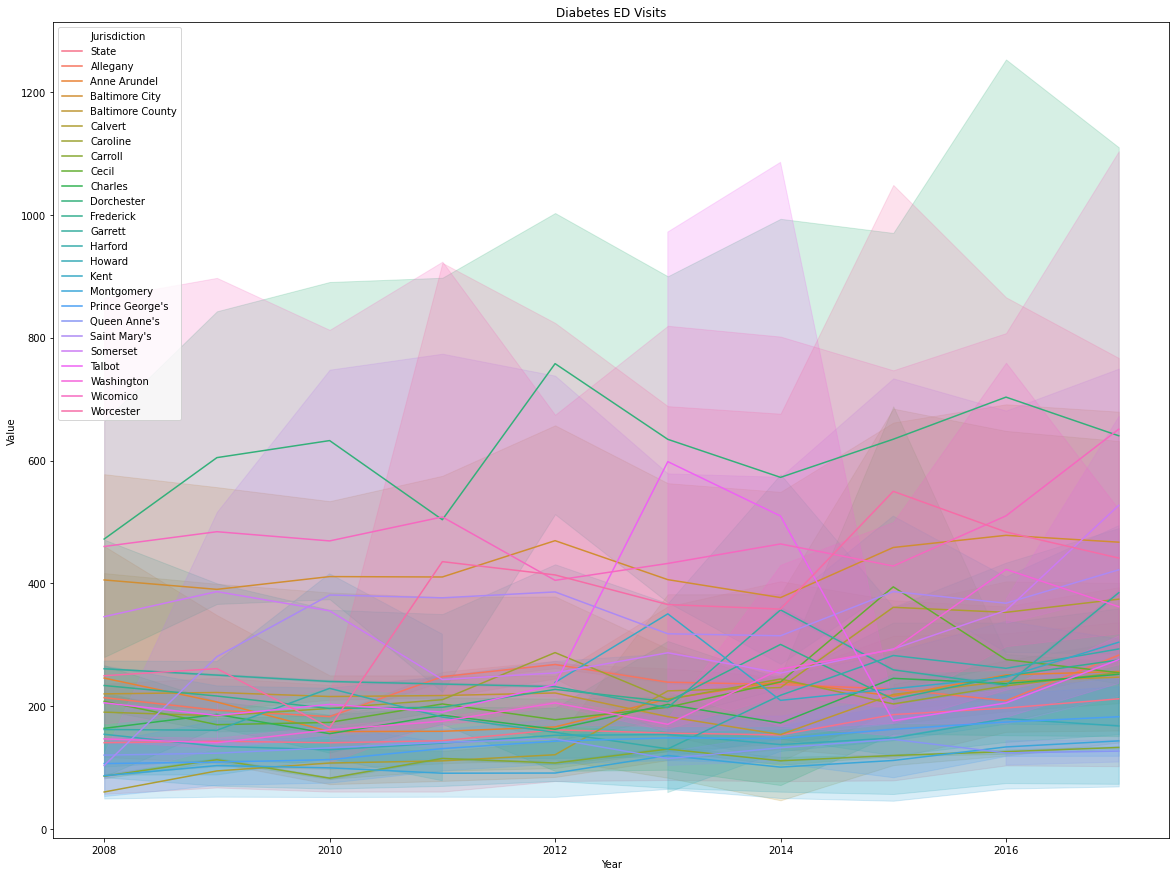

In [137]:
#1 line graph
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))

ax = sns.lineplot(x="Year", y="Value",hue="Jurisdiction",markers=True, dashes=False, data=df)
ax.set_title('Diabetes ED Visits')

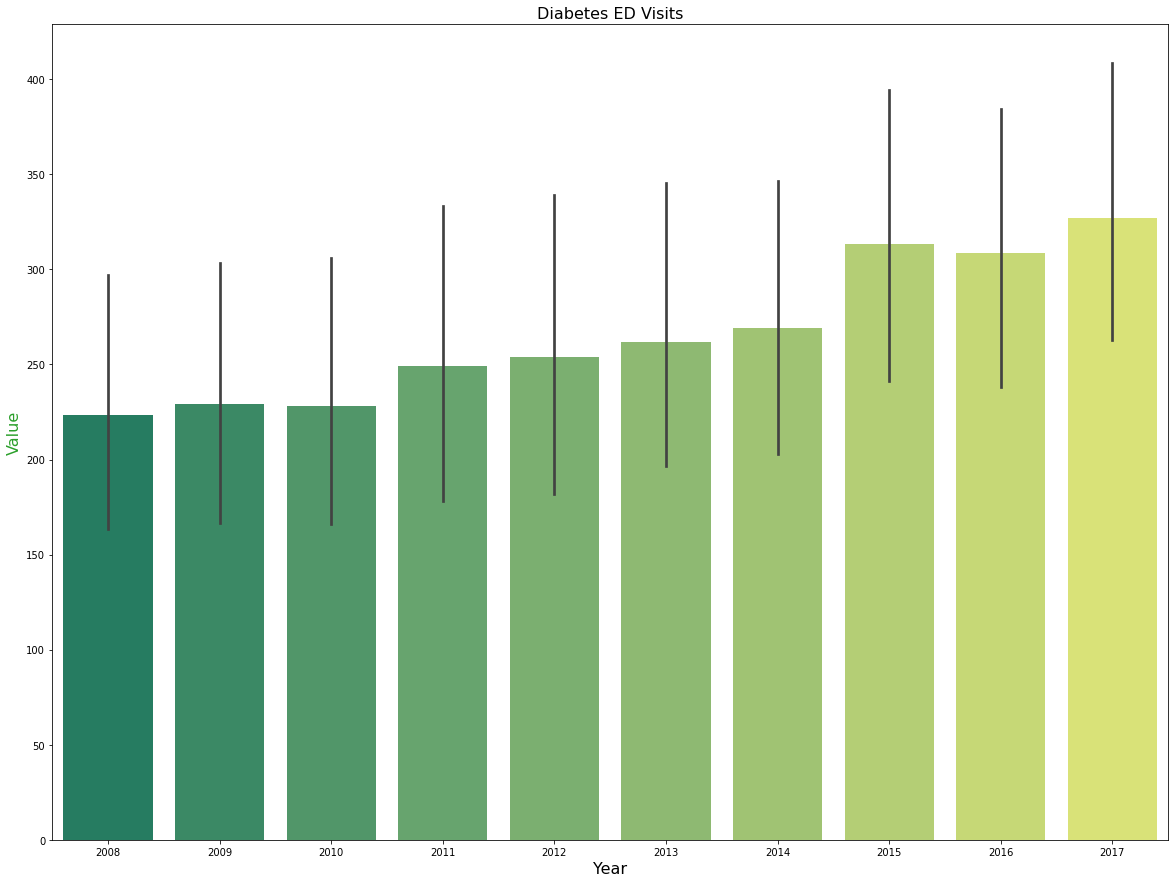

In [141]:
#2 bar chart （year vs. diabetes ED visits)
fig, ax1 = plt.subplots(figsize=(20,15))

color = 'tab:green'
ax1.set_title('Diabetes ED Visits', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Value', fontsize=16, color=color)
ax2 = sns.barplot(x='Year', y='Value', data = df_not_a, palette='summer')
ax1.tick_params(axis='y')


plt.show()

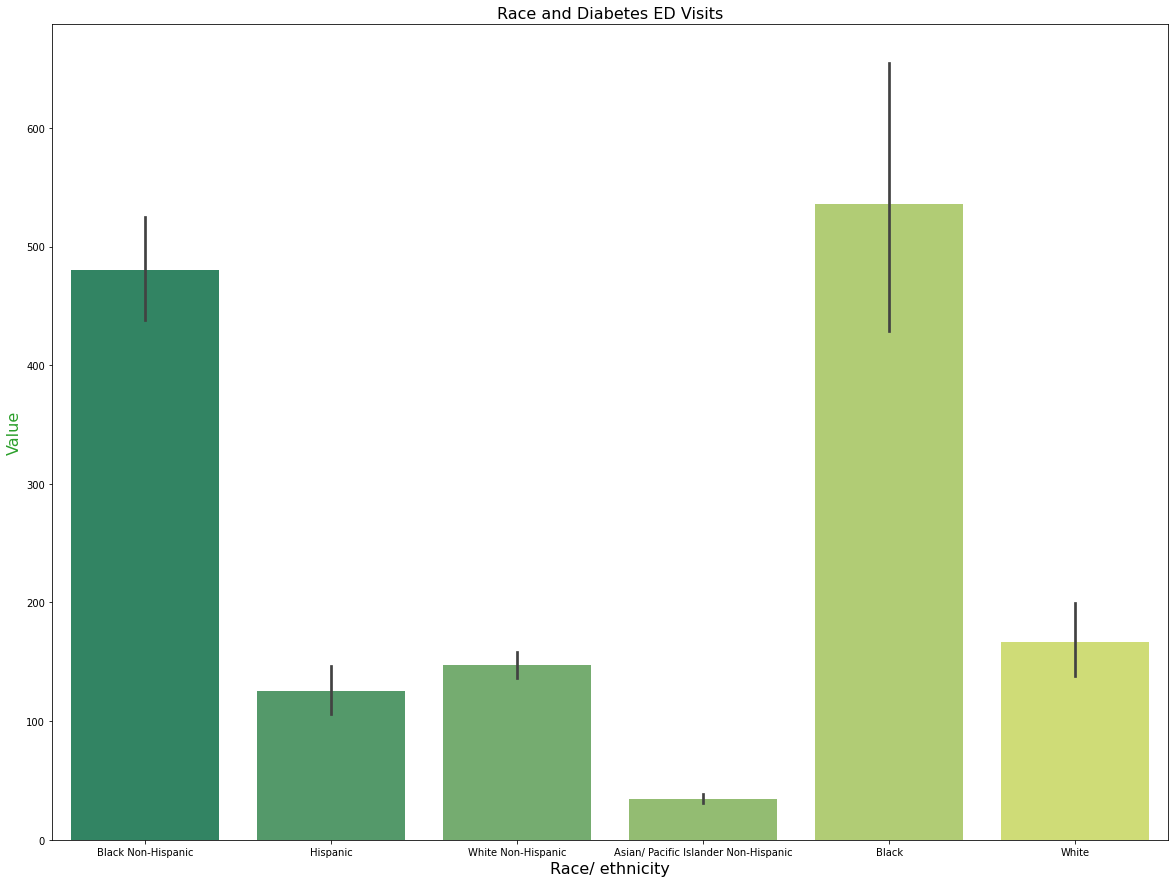

In [142]:
#3 bar chart (race & ethnicity group vs. diabetes ED visit)
fig, ax1 = plt.subplots(figsize=(20,15))

color = 'tab:green'
ax1.set_title('Race and Diabetes ED Visits', fontsize=16)
ax1.set_xlabel('Race/ ethnicity', fontsize=16)
ax1.set_ylabel('Value', fontsize=16, color=color)
ax2 = sns.barplot(x='Race/ ethnicity', y='Value', data = df_not_a, palette='summer')
ax1.tick_params(axis='y')


plt.show()

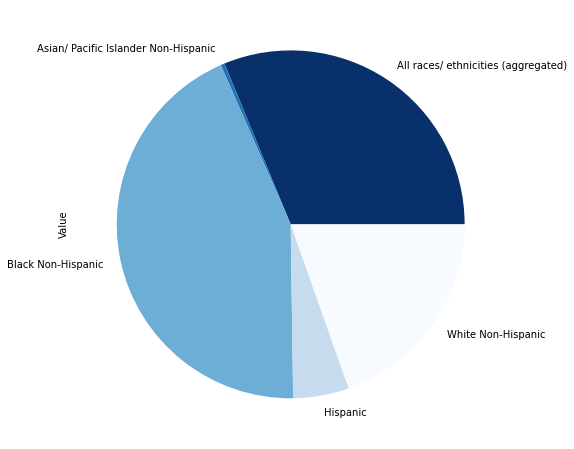

In [143]:
#4 bar chart of distribution of diabetes ED visit among different ethnicity groups in 2017
df[df['Year'] == 2017].groupby(
 ['Race/ ethnicity']
)['Value'].sum().plot(
 kind='pie',
 figsize=(12,8),
 cmap="Blues_r", # defaults to orangish
)